In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = '/content/qs-world-university-rankings-2017-to-2022-V2.csv'  # Replace with your file path
df = pd.read_csv(file_path)

In [ ]:
df.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [ ]:
# Clean the dataset
df['international_students'] = df['international_students'].str.replace(',', '').astype(float)
df['rank_display'] = pd.to_numeric(df['rank_display'], errors='coerce')

# Uncovering Trends in Global University Rankings (2017-2022)
## An exploration of global university trends in ranking, international diversity, and faculty characteristics.


###Global Ranking Overview by Region (2017–2022)
From 2017 to 2022, universities from different regions have maintained varying levels of rank scores, with North American and European institutions consistently scoring at the top. This trend underscores the strong academic and research outputs from these regions and their historical reputations.

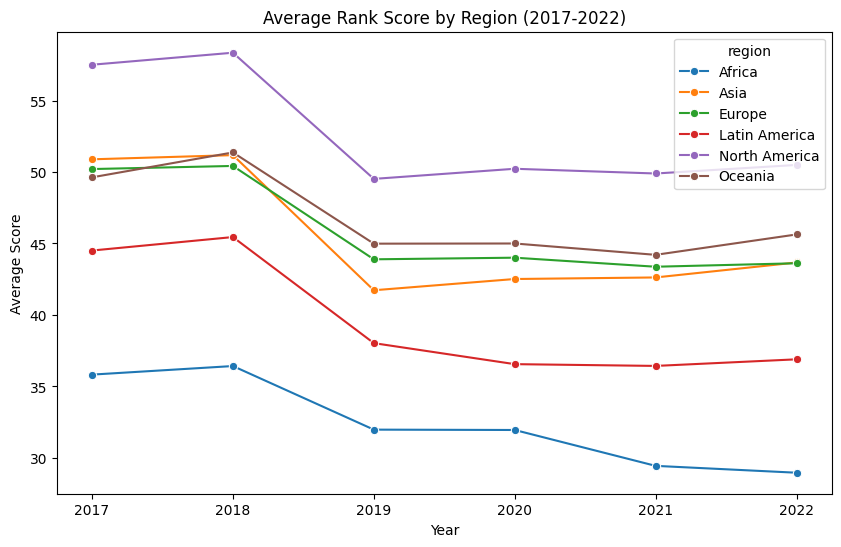

In [ ]:
# Visualization: Average Rank Score by Region
avg_score_by_region = df.groupby(['year', 'region'])['score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_score_by_region, x='year', y='score', hue='region', marker='o')
plt.title("Average Rank Score by Region (2017-2022)")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.show()


###Top Countries by International Student Enrollment
International students are increasingly choosing top universities from countries with global appeal, such as the United States and the United Kingdom. This influx of international talent reflects the global reach and attractiveness of institutions in these countries, particularly for their inclusive and research-intensive environments.

<ipython-input-15-8ad1c701efe7>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




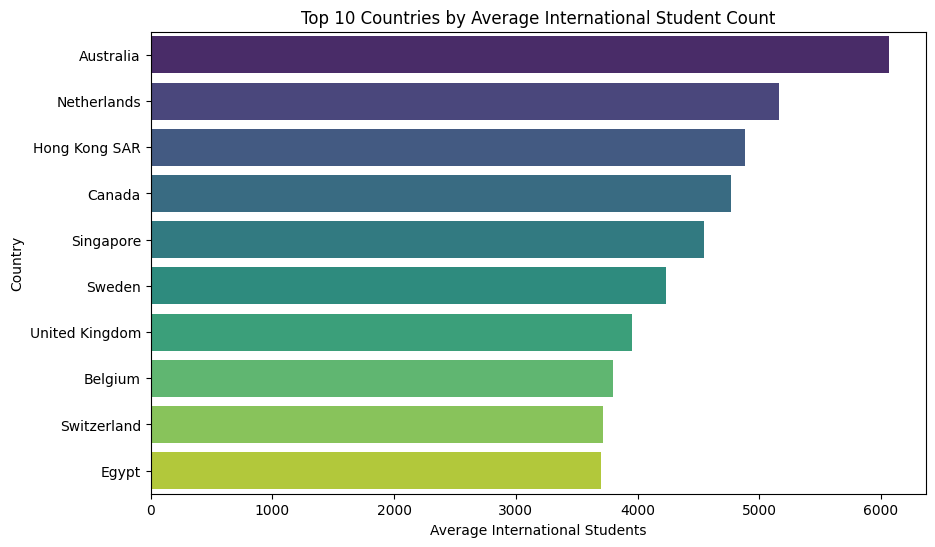

In [ ]:
# Visualization: Top 10 Countries by International Student Count
df['international_students'] = df['international_students'].replace(',', '', regex=True).astype(float)
top_countries = df.groupby('country')['international_students'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='international_students', y='country', palette="viridis")
plt.title("Top 10 Countries by Average International Student Count")
plt.xlabel("Average International Students")
plt.ylabel("Country")
plt.show()


###Student-Faculty Ratios in Private vs. Public Universities
Another interesting pattern emerges when comparing student-faculty ratios between private and public universities. Private institutions tend to have lower ratios, suggesting smaller class sizes that allow for closer student-faculty interactions—an appealing aspect for students looking for personalized attention and a supportive academic environment.

<ipython-input-16-ea5684524a3b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




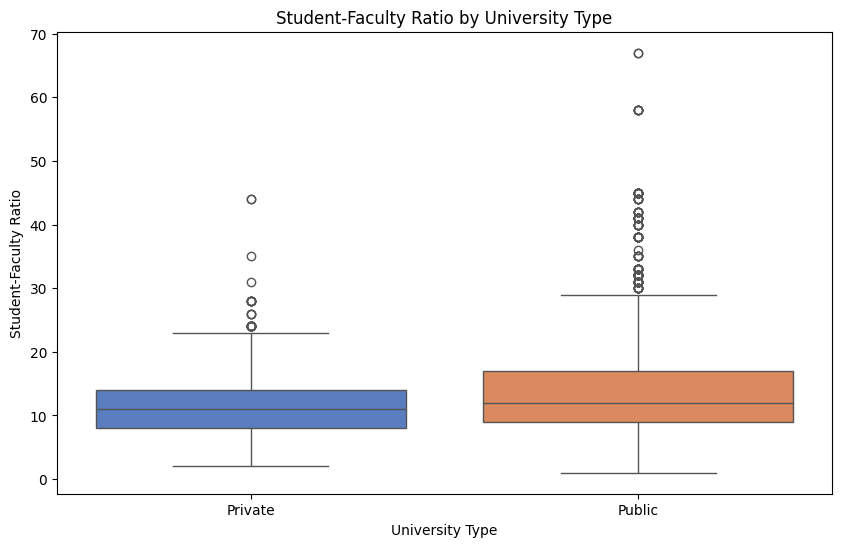

In [ ]:
# Visualization: Student-Faculty Ratio by University Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='student_faculty_ratio', palette="muted")
plt.title("Student-Faculty Ratio by University Type")
plt.xlabel("University Type")
plt.ylabel("Student-Faculty Ratio")
plt.show()


###Stability Among the Top 10 Universities: Competition and Consistency
When examining the score trends of the top 10 universities from 2017 to 2022, it becomes clear that these institutions have established themselves firmly at the top. This consistency reflects their dedication to maintaining high academic standards and adapting to evolving educational demands. However, subtle shifts in their scores hint at a continuous competition for the leading positions.

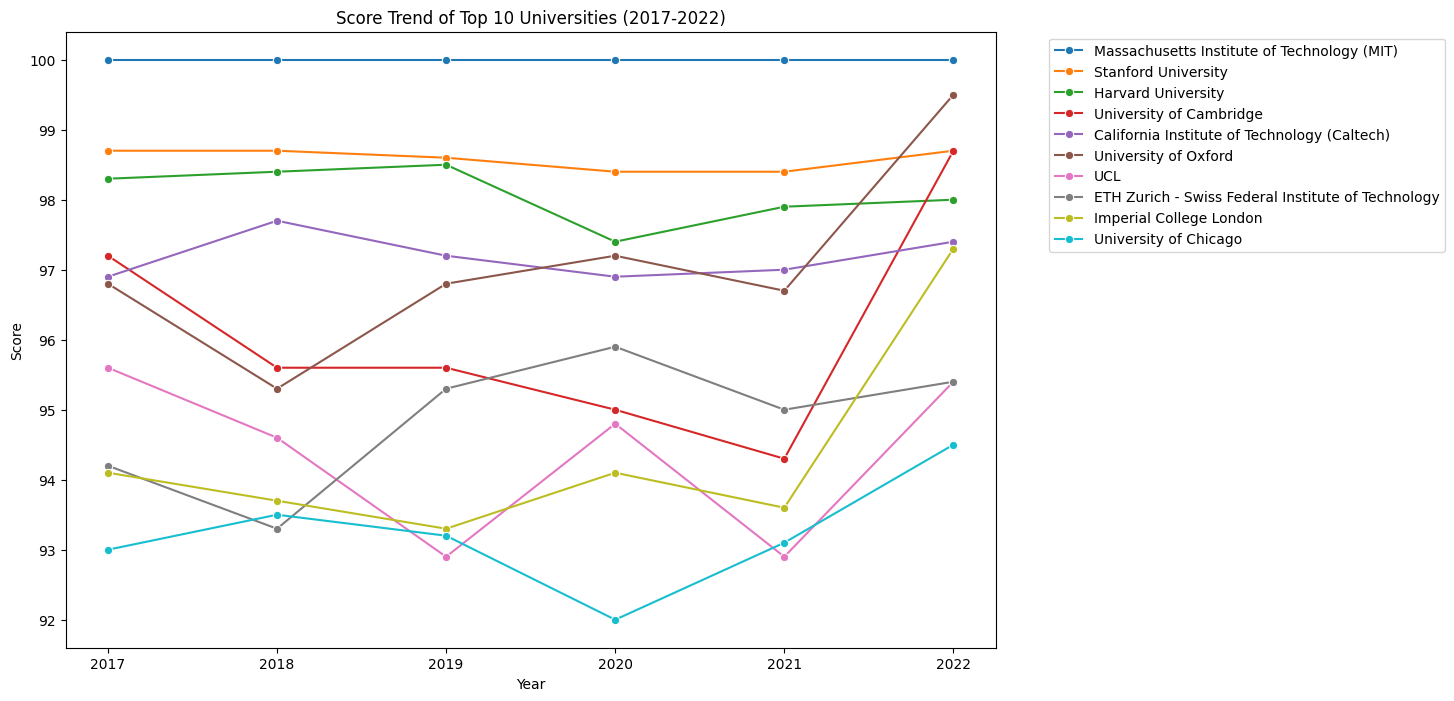

In [ ]:
# Visualization: Score Trend of Top 10 Universities
top_universities = df.groupby('university')['score'].mean().nlargest(10).index
top_universities_data = df[df['university'].isin(top_universities)]
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_universities_data, x='year', y='score', hue='university', marker='o')
plt.title("Score Trend of Top 10 Universities (2017-2022)")
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###Conclusion
This journey through the QS World University Rankings reveals some important themes in global education: the persistent excellence of North American and European universities, the international allure of educational hubs in the US and UK, and the benefits that private institutions offer with lower student-faculty ratios. These trends highlight the diverse pathways through which universities appeal to students worldwide and maintain their standing in an increasingly competitive academic landscape.